<a href="https://colab.research.google.com/github/Saif-crypt/Utilities-Boiler-Final/blob/main/boiler_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHASE 3: ANALYSIS & VISUALIZATION

# STEP 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style for plots
plt.style.use('default')
sns.set_palette("viridis")
%matplotlib inline

# STEP 2:Upload the Phase 2 results file

In [3]:
print("📤 Please upload the 'boiler_data_with_efficiency.csv' file from Phase 2:")
uploaded = files.upload()

📤 Please upload the 'boiler_data_with_efficiency.csv' file from Phase 2:


Saving boiler_data_with_efficiency.csv to boiler_data_with_efficiency.csv


# STEP 3:Load the data

In [4]:
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, index_col='Date', parse_dates=['Date'])

print(f"✅ File '{file_name}' loaded successfully!")
print(f"Dataset Shape: {df.shape}")
print("\n--- Available Columns ---")
print(df.columns.tolist())

✅ File 'boiler_data_with_efficiency.csv' loaded successfully!
Dataset Shape: (33, 37)

--- Available Columns ---
['boiler', 'ng_meter_m3', 'boiler_steam_tons', 'feed_water_kl', 'hp_steam_tons', 'lp_steam_kg', 'soft_water_inlet_kl', 'soft_water_outlet_kl', 'ng_skid_converted', 'ng_skid_unconverted', 'cereal_condensate_ltr', 'da_makeup_tank_kl', 'Avg_Feed_Water_Tank_Level_(50 to 70%)', 'Avg_Feed_Water_Tank_Temperature_(102 to 105 C)', 'Avg_Feed_Water_Tank_Pressure_(<0.5 kg/cm2)', 'Avg_Boiler1_Level_Guage_(40-50%)', 'Avg_Boiler1_Drum_Steam_Pressure', 'Avg_Boiler1_Modulation_%', 'Avg_Boiler1_F.D_FAN_AIR_Temperature_(OUTLET_TEMPERATURE)', 'Avg_BOILER1_A.P.H_FLUE_GAS_OUTLET_TEMPERATURE_(<300 C)', 'Avg_BOILER1_A.P.H_FLUE_GAS_INLET_TEMPERATURE_(<150 C)', 'Avg_BOILER1_A.P.H_FLUE_GAS_O2_%', 'Avg_Chimney_Temperature_C', 'Avg_NG_CV_kcal_per_Nm3', 'Avg_SoftWater_pH', 'Avg_SoftWater_Hardness_ppm', 'Avg_Feed_Water_Temp_C', 'Avg_Feed_Water_Conductivity_uScm', 'Avg_Feed_Water_pH', 'Avg_Feed_Water_DO_pp

# STEP 4:Basic Efficiency Analysis

In [5]:
print("\n" + "="*60)
print("EFFICIENCY ANALYSIS SUMMARY")
print("="*60)

# Basic statistics
eff_stats = df['Efficiency_%'].describe()
print("--- Efficiency Statistics ---")
print(f"Average Efficiency: {eff_stats['mean']:.2f}%")
print(f"Minimum Efficiency: {eff_stats['min']:.2f}%")
print(f"Maximum Efficiency: {eff_stats['max']:.2f}%")
print(f"Standard Deviation: {eff_stats['std']:.2f}%")
print(f"25th Percentile: {eff_stats['25%']:.2f}%")
print(f"75th Percentile: {eff_stats['75%']:.2f}%")

# Count days by efficiency ranges
print("\n--- Efficiency Distribution ---")
bins = [0, 70, 75, 80, 85, 100]
labels = ['<70%', '70-75%', '75-80%', '80-85%', '>85%']
df['Efficiency_Range'] = pd.cut(df['Efficiency_%'], bins=bins, labels=labels)
eff_distribution = df['Efficiency_Range'].value_counts().sort_index()
print(eff_distribution)


EFFICIENCY ANALYSIS SUMMARY
--- Efficiency Statistics ---
Average Efficiency: 77.79%
Minimum Efficiency: 75.85%
Maximum Efficiency: 79.52%
Standard Deviation: 1.01%
25th Percentile: 77.00%
75th Percentile: 78.30%

--- Efficiency Distribution ---
Efficiency_Range
<70%       0
70-75%     0
75-80%    33
80-85%     0
>85%       0
Name: count, dtype: int64


# STEP 5:Create Visualizations


CREATING VISUALIZATIONS


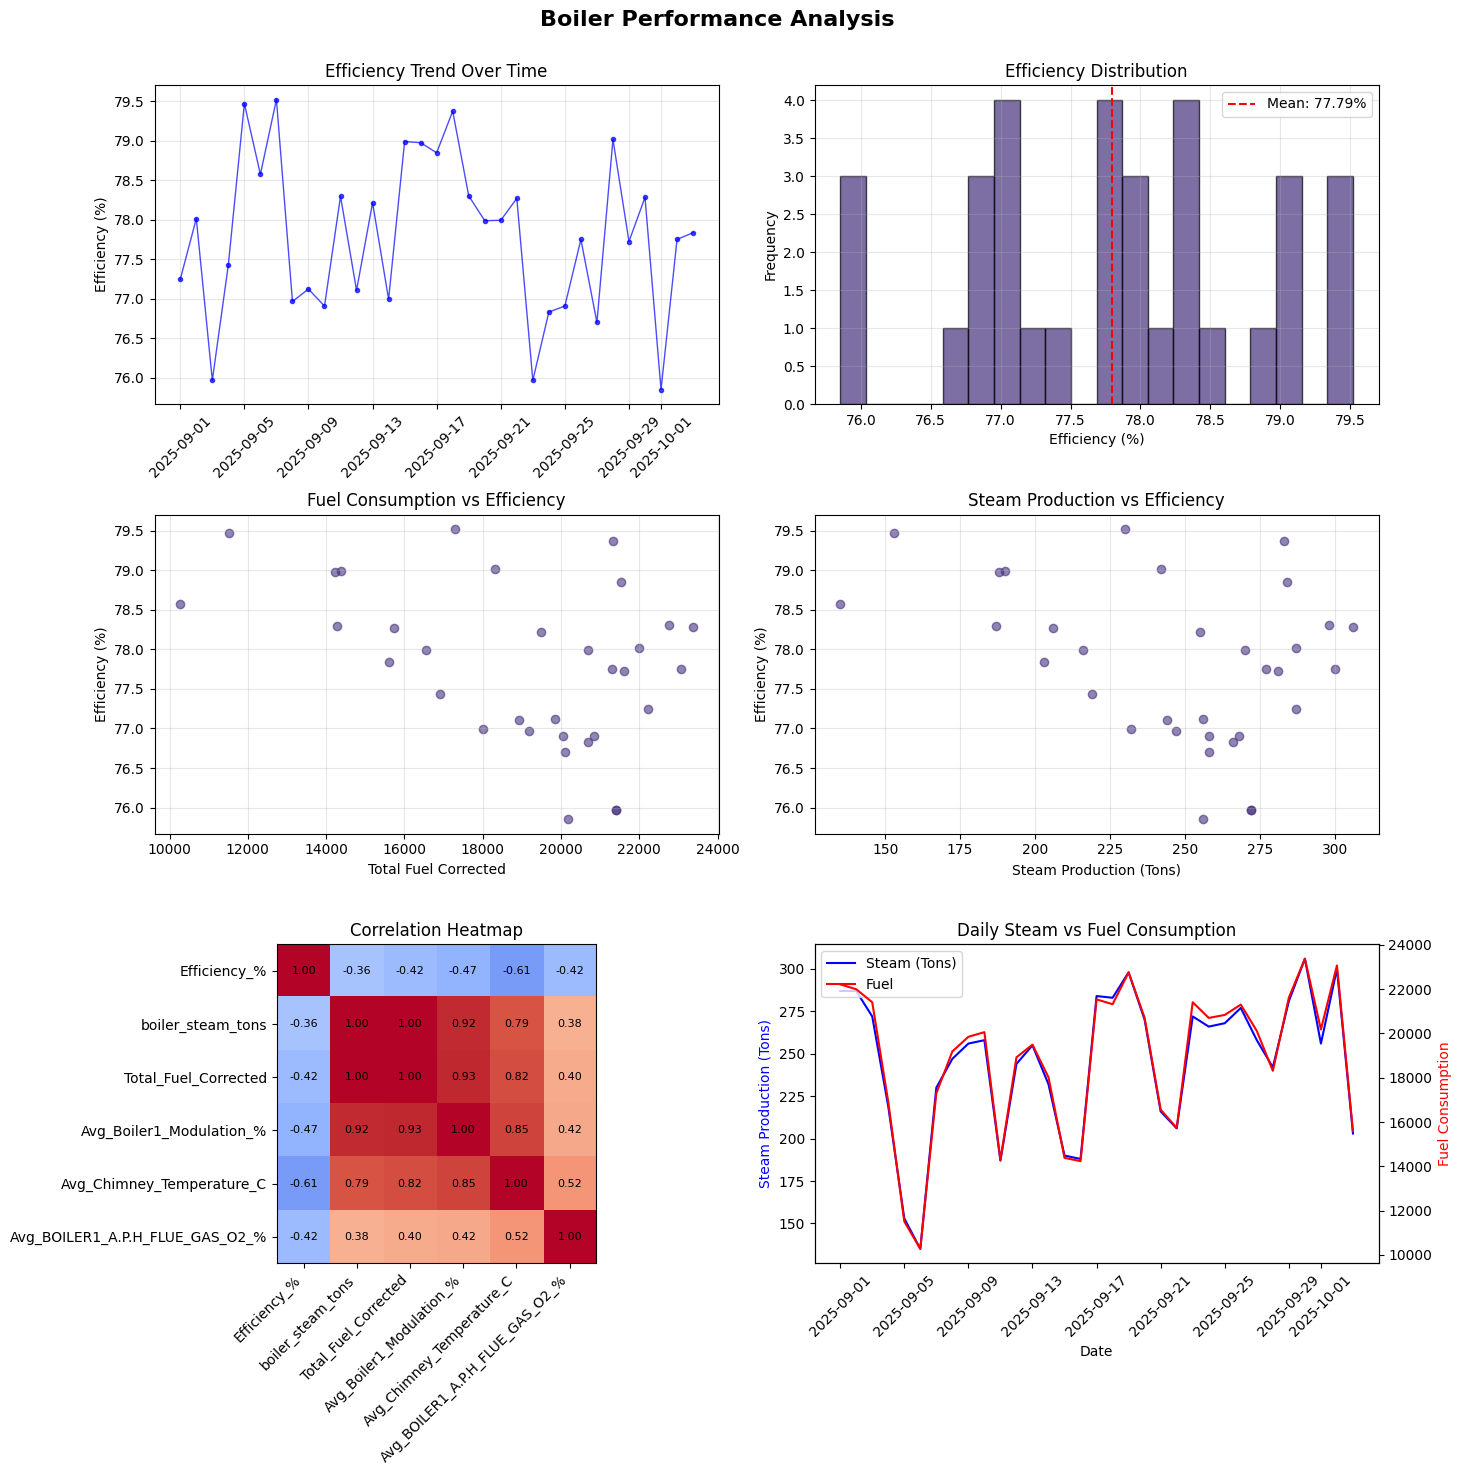

In [6]:
print("\n" + "="*60)
print("CREATING VISUALIZATIONS")
print("="*60)

# Set up the plotting layout
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Boiler Performance Analysis', fontsize=16, fontweight='bold')

# Plot 1: Efficiency Trend Over Time
axes[0, 0].plot(df.index, df['Efficiency_%'], marker='o', linestyle='-',
                linewidth=1, markersize=3, color='blue', alpha=0.7)
axes[0, 0].set_title('Efficiency Trend Over Time')
axes[0, 0].set_ylabel('Efficiency (%)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Efficiency Distribution Histogram
axes[0, 1].hist(df['Efficiency_%'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 1].axvline(df['Efficiency_%'].mean(), color='red', linestyle='--',
                  label=f'Mean: {df["Efficiency_%"].mean():.2f}%')
axes[0, 1].set_title('Efficiency Distribution')
axes[0, 1].set_xlabel('Efficiency (%)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Fuel Consumption vs Efficiency
if 'Total_Fuel_Corrected' in df.columns:
    axes[1, 0].scatter(df['Total_Fuel_Corrected'], df['Efficiency_%'], alpha=0.6)
    axes[1, 0].set_title('Fuel Consumption vs Efficiency')
    axes[1, 0].set_xlabel('Total Fuel Corrected')
    axes[1, 0].set_ylabel('Efficiency (%)')
    axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Steam Production vs Efficiency
if 'boiler_steam_tons' in df.columns:
    axes[1, 1].scatter(df['boiler_steam_tons'], df['Efficiency_%'], alpha=0.6)
    axes[1, 1].set_title('Steam Production vs Efficiency')
    axes[1, 1].set_xlabel('Steam Production (Tons)')
    axes[1, 1].set_ylabel('Efficiency (%)')
    axes[1, 1].grid(True, alpha=0.3)

# Plot 5: Correlation Heatmap (Select key columns)
key_columns = ['Efficiency_%', 'boiler_steam_tons', 'Total_Fuel_Corrected',
               'Avg_Boiler1_Modulation_%', 'Avg_Chimney_Temperature_C',
               'Avg_BOILER1_A.P.H_FLUE_GAS_O2_%']
corr_df = df[key_columns].corr()

im = axes[2, 0].imshow(corr_df, cmap='coolwarm', vmin=-1, vmax=1)
axes[2, 0].set_title('Correlation Heatmap')
axes[2, 0].set_xticks(range(len(corr_df.columns)))
axes[2, 0].set_yticks(range(len(corr_df.columns)))
axes[2, 0].set_xticklabels(corr_df.columns, rotation=45, ha='right')
axes[2, 0].set_yticklabels(corr_df.columns)

# Add correlation values to heatmap
for i in range(len(corr_df.columns)):
    for j in range(len(corr_df.columns)):
        text = axes[2, 0].text(j, i, f'{corr_df.iloc[i, j]:.2f}',
                              ha="center", va="center", color="black", fontsize=8)

# Plot 6: Daily Key Metrics
if all(col in df.columns for col in ['boiler_steam_tons', 'Total_Fuel_Corrected']):
    ax2 = axes[2, 1].twinx()
    line1 = axes[2, 1].plot(df.index, df['boiler_steam_tons'], 'b-', label='Steam (Tons)')
    line2 = ax2.plot(df.index, df['Total_Fuel_Corrected'], 'r-', label='Fuel')
    axes[2, 1].set_title('Daily Steam vs Fuel Consumption')
    axes[2, 1].set_xlabel('Date')
    axes[2, 1].set_ylabel('Steam Production (Tons)', color='blue')
    ax2.set_ylabel('Fuel Consumption', color='red')
    axes[2, 1].tick_params(axis='x', rotation=45)

    # Combine legends
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    axes[2, 1].legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# STEP 6:Advanced Analysis

In [7]:
print("\n" + "="*60)
print("ADVANCED ANALYSIS")
print("="*60)

# Top 5 most efficient days
print("--- Top 5 Most Efficient Days ---")
top_efficient = df.nlargest(5, 'Efficiency_%')[['Efficiency_%', 'boiler_steam_tons', 'Total_Fuel_Corrected']]
print(top_efficient)

print("\n--- Top 5 Least Efficient Days ---")
least_efficient = df.nsmallest(5, 'Efficiency_%')[['Efficiency_%', 'boiler_steam_tons', 'Total_Fuel_Corrected']]
print(least_efficient)

# Weekly analysis
weekly_eff = df['Efficiency_%'].resample('W').mean()
print(f"\n--- Weekly Average Efficiency: {weekly_eff.mean():.2f}%")


ADVANCED ANALYSIS
--- Top 5 Most Efficient Days ---
            Efficiency_%  boiler_steam_tons  Total_Fuel_Corrected
Date                                                             
2025-09-07     79.519883                230          17295.997066
2025-09-05     79.467868                153          11513.128929
2025-09-18     79.372305                283          21321.165566
2025-09-28     79.015909                242          18314.468660
2025-09-15     78.988954                190          14384.035267

--- Top 5 Least Efficient Days ---
            Efficiency_%  boiler_steam_tons  Total_Fuel_Corrected
Date                                                             
2025-10-01     75.852354                256          20182.009379
2025-09-03     75.969616                272          21410.286280
2025-09-23     75.969616                272          21410.286280
2025-09-27     76.702167                258          20114.330114
2025-09-24     76.832877                266          

# STEP 7:Save analysis results

In [8]:
print("\n" + "="*60)
print("SAVING ANALYSIS RESULTS")
print("="*60)

# Create a summary report
summary_report = f"""
BOILER EFFICIENCY ANALYSIS REPORT
=================================
Analysis Period: {df.index.min().date()} to {df.index.max().date()}
Total Days Analyzed: {len(df)}

OVERALL EFFICIENCY:
- Average Efficiency: {eff_stats['mean']:.2f}%
- Minimum Efficiency: {eff_stats['min']:.2f}%
- Maximum Efficiency: {eff_stats['max']:.2f}%
- Standard Deviation: {eff_stats['std']:.2f}%

EFFICIENCY DISTRIBUTION:
{eff_distribution.to_string()}

RECOMMENDATIONS:
1. Investigate days with efficiency below {eff_stats['25%']:.2f}%
2. Analyze operational parameters on high-efficiency days for best practices
3. Monitor fuel quality and combustion parameters regularly
"""

print(summary_report)

# Save detailed analysis to CSV
analysis_file = 'boiler_efficiency_analysis_report.csv'
df.to_csv(analysis_file)
print(f"✅ Detailed analysis saved to: '{analysis_file}'")


SAVING ANALYSIS RESULTS

BOILER EFFICIENCY ANALYSIS REPORT
Analysis Period: 2025-09-01 to 2025-10-03
Total Days Analyzed: 33

OVERALL EFFICIENCY:
- Average Efficiency: 77.79%
- Minimum Efficiency: 75.85%
- Maximum Efficiency: 79.52%
- Standard Deviation: 1.01%

EFFICIENCY DISTRIBUTION:
Efficiency_Range
<70%       0
70-75%     0
75-80%    33
80-85%     0
>85%       0

RECOMMENDATIONS:
1. Investigate days with efficiency below 77.00%
2. Analyze operational parameters on high-efficiency days for best practices
3. Monitor fuel quality and combustion parameters regularly

✅ Detailed analysis saved to: 'boiler_efficiency_analysis_report.csv'


# STEP 8:Download results

In [9]:
print("\n📥 Download your analysis results:")
files.download(analysis_file)

print("\n" + "="*60)
print("ANALYSIS COMPLETE! 🎉")
print("="*60)
print("Key insights generated:")
print("1. Efficiency trends over time")
print("2. Correlation between different parameters")
print("3. Best and worst performing days")
print("4. Statistical summary of boiler performance")
print("5. Visualizations for easy understanding")


📥 Download your analysis results:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


ANALYSIS COMPLETE! 🎉
Key insights generated:
1. Efficiency trends over time
2. Correlation between different parameters
3. Best and worst performing days
4. Statistical summary of boiler performance
5. Visualizations for easy understanding
